In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

# Wczytanie danych

In [82]:
data = pd.read_csv("forest_fires_dataset.csv")
data

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [83]:
data.keys()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [85]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [86]:
# dodanie kolumny informującej o tym czy pożar był
data['is_fire'] = (data['area'] > 0).astype(int)
# zamiana nazw miesięcy na liczby
months_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7,
               'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
data['month'] = data['month'].apply(lambda x: months_dict[x])

# zmiana nazw dni na liczby
days_dict = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7}
data['day'] = data['day'].apply(lambda x: days_dict[x])
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,is_fire
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00,0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00,0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00,0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00,0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44,1
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29,1
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16,1
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00,0


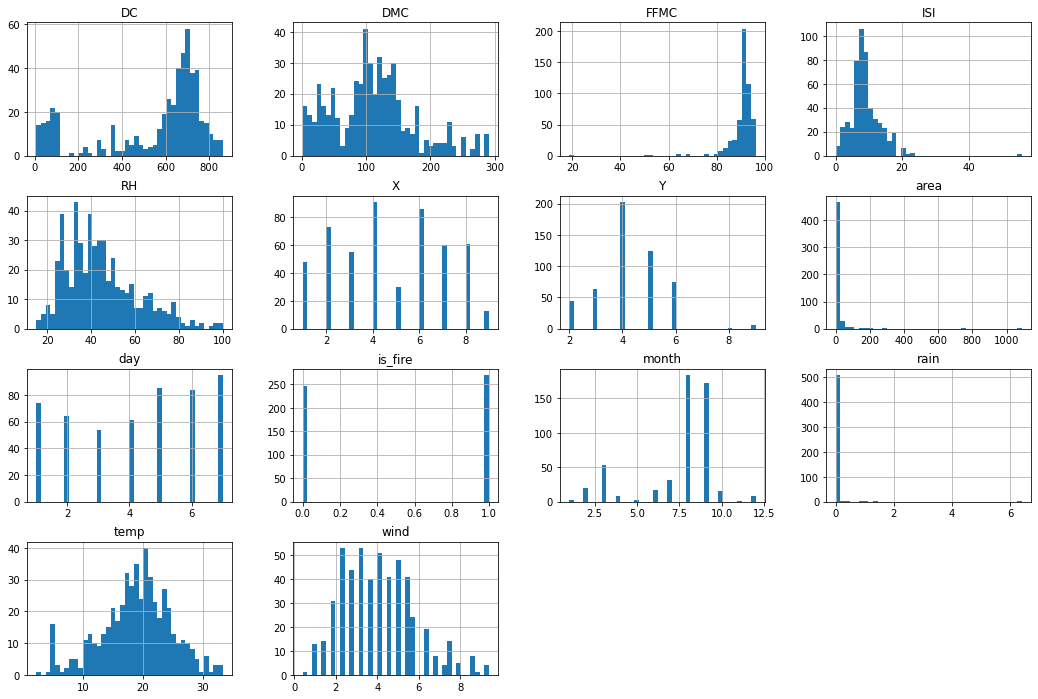

In [87]:
data.hist(bins=40, figsize=(18,12))

plt.show()

## Wstępne obserwacje
1. Zauważamy, że w tym lesie prawie nie pada.

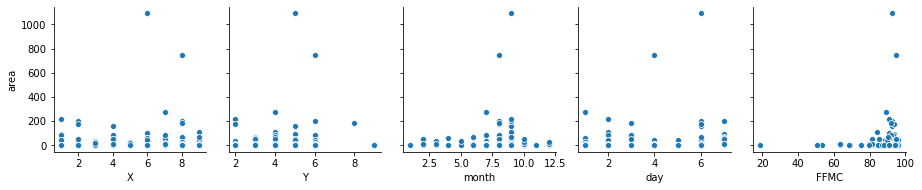

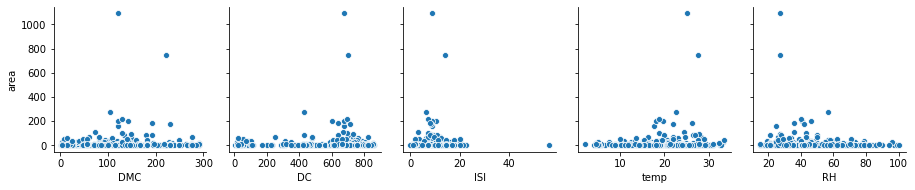

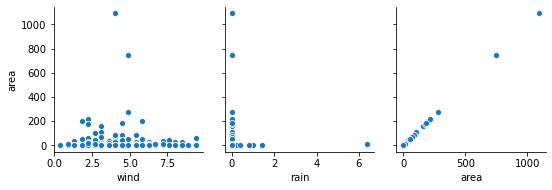

In [88]:
sns.pairplot(data, y_vars='area', x_vars=data.columns.values[:5])
sns.pairplot(data, y_vars='area', x_vars=data.columns.values[5:10])
sns.pairplot(data, y_vars='area', x_vars=data.columns.values[10:-1])

plt.show()

### Narysujmy wykresy bez obserwacji odstających

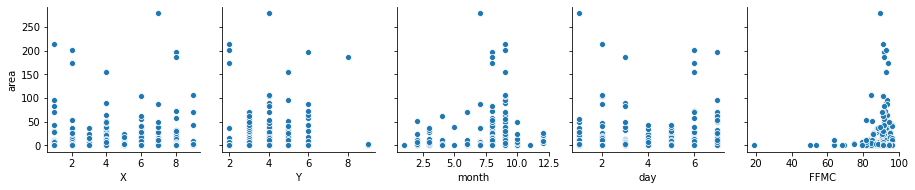

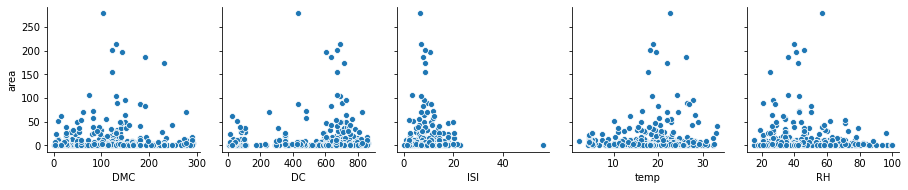

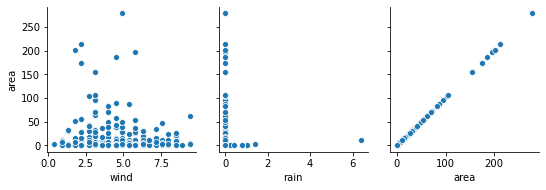

In [89]:
df_plot = data[data['area'] < 600]
df_plot

sns.pairplot(df_plot, y_vars='area', x_vars=df_plot.columns.values[:5])
sns.pairplot(df_plot, y_vars='area', x_vars=df_plot.columns.values[5:10])
sns.pairplot(df_plot, y_vars='area', x_vars=df_plot.columns.values[10:-1])

plt.show()

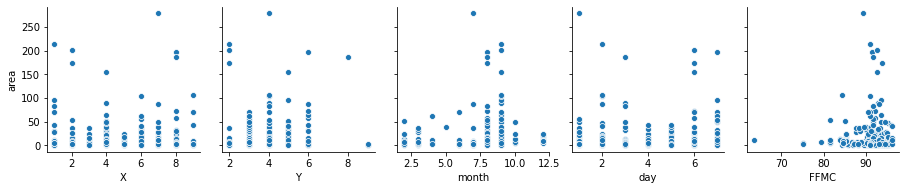

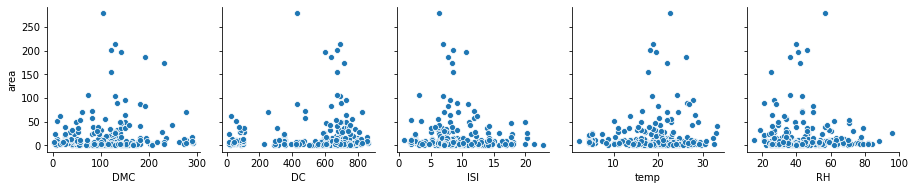

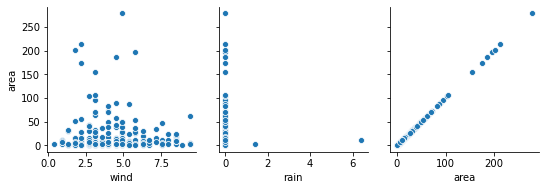

In [90]:
# zobaczmy wykresy po wykluczeniu zer i obserwacji odstających
df_plot = data[(data['area'] != 0) & (data['area'] < 600)]

sns.pairplot(df_plot, y_vars='area', x_vars=data.columns.values[:5])
sns.pairplot(df_plot, y_vars='area', x_vars=data.columns.values[5:10])
sns.pairplot(df_plot, y_vars='area', x_vars=data.columns.values[10:-1])

plt.show()

### Popatrzmy na zależności między zmiennymi
1. Możemy zaobserwować zależność między temp i RH,
2. DMC i temp,
3. ISI i temp,
4. ISI i FFMC,
5. DC i DMC.

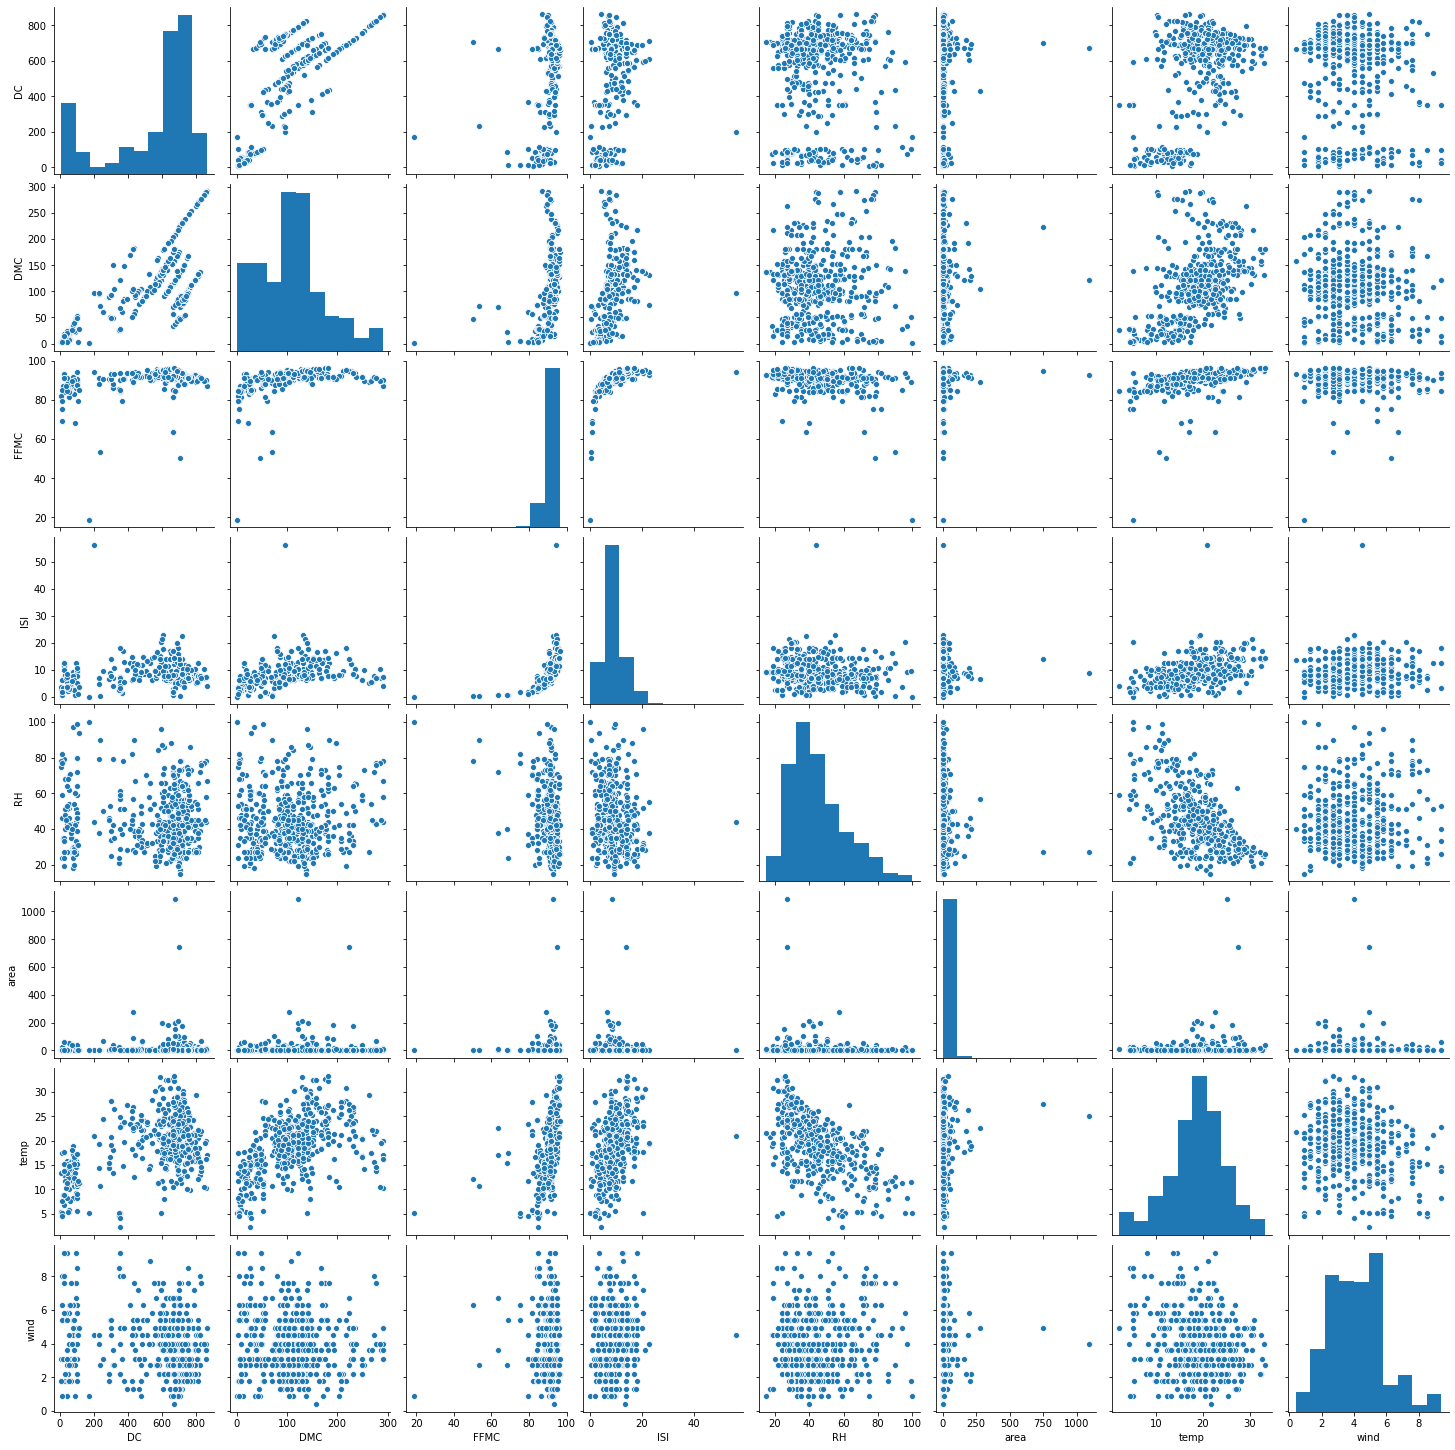

In [92]:
sns.pairplot(data[data.columns.difference(['X', 'Y', 'day', 'month', 'rain', 'is_fire'])])

plt.show()

In [93]:
# funkcja z lab1 troszkę zmodyfikowana
def plot_linear_model(x, y):
    m = LinearRegression()
    m.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    y_hat = m.predict(x.values.reshape(-1, 1))
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y)
    plt.plot(x, y_hat, c='red')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    plt.close('all')
    print(f'RMSE: {np.sqrt(mean_squared_error(y, y_hat)):.3f}')

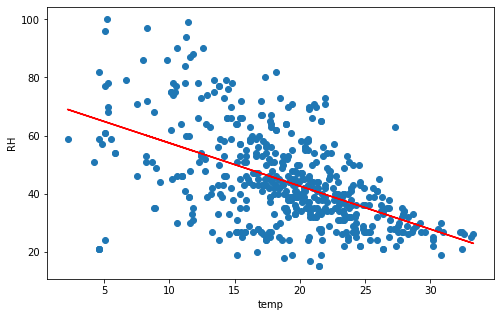

RMSE: 13.850


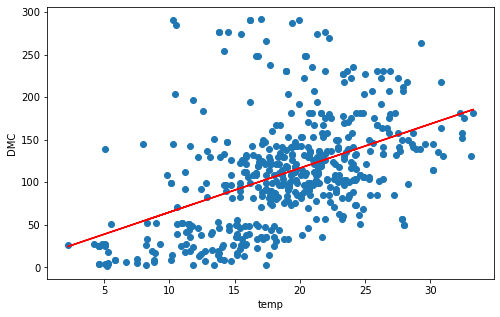

RMSE: 56.491


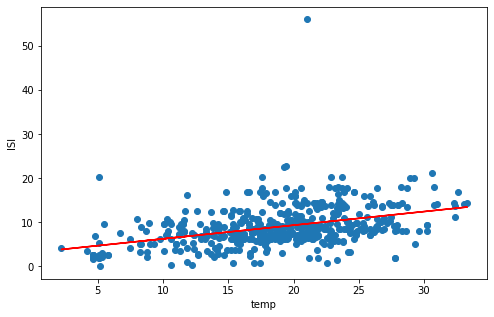

RMSE: 4.186


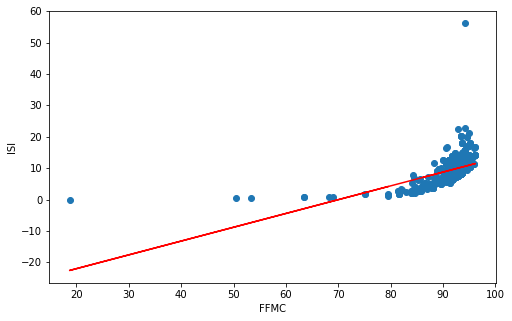

RMSE: 3.858


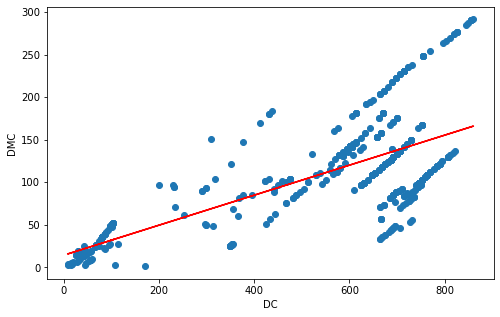

RMSE: 46.784


In [94]:
plot_linear_model(data['temp'], data['RH'])
plot_linear_model(data['temp'], data['DMC'])
plot_linear_model(data['temp'], data['ISI'])
plot_linear_model(data['FFMC'], data['ISI'])
plot_linear_model(data['DC'], data['DMC'])

### Sprawdźmy w których rejonach płoną największe powierzchnie

In [101]:
forest_map = data.groupby(['X', 'Y'])['area'].mean().reset_index(name='mean_area')
temp = data.groupby(['X', 'Y'])['is_fire'].sum().reset_index(name='counts')
forest_map = forest_map.merge(temp, on=['X', 'Y'])
forest_map

,X,Y,mean_area,counts
0,1,2,11.575789,4
1,1,3,15.714000,7
2,1,4,10.018667,10
3,1,5,28.867500,4
4,2,2,18.506000,11
5,2,3,0.000000,0
6,2,4,5.310000,17
7,2,5,4.631500,14
8,3,3,6.580000,1
9,3,4,2.938372,15


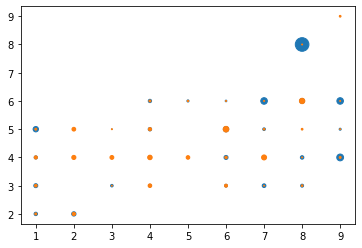

In [106]:
plt.scatter(data=forest_map, x='X', y='Y', marker='o', s='mean_area')
plt.scatter(data=forest_map, x='X', y='Y', marker='o', s='counts')

plt.show()

- najczęściej płoną obszary o współrzędnych (6, 5), (7,4) oraz (8,6);
- największe pożary były w (8,8)

### Obserwacje ze względu na okres czasu

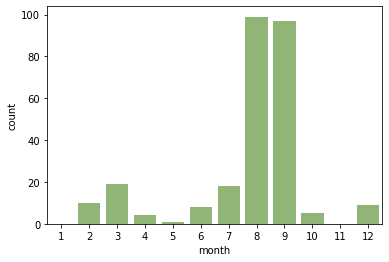

In [112]:
days = data.groupby(['month'])['is_fire'].sum().reset_index(name='count')

sns.barplot(data=days, x='month', y='count', color='#90be6d')

plt.show()

Najwięcej pożarów jest w sierpniu i wrześniu.

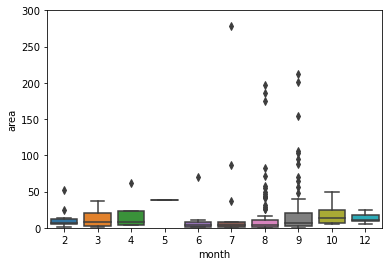

In [124]:
# na wykresie zostały obcięte dwie największe wartości  jednak są one brane pod uwagę w obliczeniach
p = sns.boxplot(data=data[data['area'] != 0], x='month', y='area')
p.set(ylim=(0, 300))

plt.show()

Po wzięciu pod uwagę obserwacji, w których wystąpił pożar widzimy, że średnio największe powierzchnie płoną w październiku, maju oraz we wrześniu. W sierpniu i wrześniu widać, że wystąpiło dużo większych pożarów.

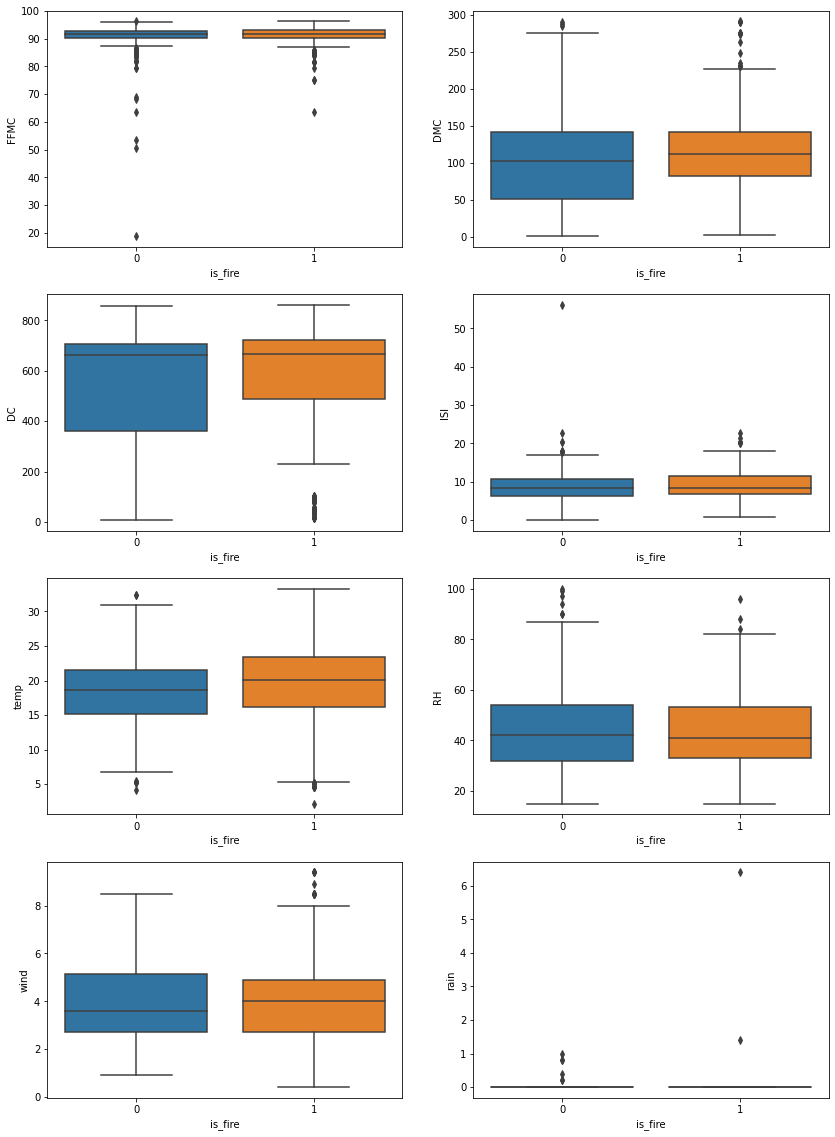

In [125]:
fig, ax = plt.subplots(4,2, figsize=(14, 20))
i = 0
j = 0
for column in data.columns[4:-2]:
    sns.boxplot(data=data, x='is_fire', y=column, ax=ax[j][i])
    i += 1
    if i % 2 == 0:
        j += 1
        i = 0
plt.show()

### Obserwacje z boxplotów
1. Wyższe DMC lub DC może się wiązać z pożarem.
2. Pożary występują w wyższej tempraturze.

# Pandas profiling

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('forest_fires_dataset.csv')
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Wady
- przy większej liczbie danych taki raport mógłby się generować bardzo długo,
- algorytm nie przewiduje wprowadzania pomocniczych kolumn.